In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/data-portfolio

/content/drive/MyDrive/data-portfolio


In [ ]:
!git config --global user.email "wheelessbrian@yahoo.com"
!git config --global user.name "bwheeless7"

In [ ]:
!mv "/content/drive/MyDrive/Colab Notebooks/03_customer_lifetime_value_and_growth_optimization.ipynb" banking-revenue-forecasting/notebooks

In [ ]:
!git add .
!git commit -m "Banking revenue and forecasting project final commit"
!git push

[main 258cf37] Banking revenue and forecasting project final commit
 2 files changed, 2 insertions(+), 1 deletion(-)
 rewrite banking-revenue-forecasting/notebooks/01_data_generation_and_eda.ipynb (98%)
 create mode 100644 banking-revenue-forecasting/notebooks/03_customer_lifetime_value_and_growth_optimization.ipynb
Enumerating objects: 10, done.
Counting objects: 100% (10/10), done.
Delta compression using up to 2 threads
Compressing objects: 100% (6/6), done.
Writing objects: 100% (6/6), 9.66 KiB | 471.00 KiB/s, done.
Total 6 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/bwheeless7/data-portfolio.git
   8f7e2a7..258cf37  main -> main


# Banking Revenue Forecasting & Growth Optimization  
## Customer Lifetime Value & Growth Optimization

**Objective:**  
Estimate customer lifetime value (CLV), segment customers by economic impact, and design data-driven growth strategies.


In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/drive/MyDrive/data-portfolio/banking-revenue-forecasting/data/banking_revenue_data.csv")


In [21]:
data.columns

Index(['customer_id', 'month', 'spend', 'fee_revenue', 'interest_revenue',
       'age', 'income', 'credit_score', 'tenure_months', 'segment',
       'total_revenue'],
      dtype='object')

In [ ]:
clv_data = data.groupby("customer_id").agg(
    total_revenue=("total_revenue", "sum"),
    active_months=("month", "nunique"),
    monthly_revenue=("total_revenue", "mean"),
    tenure_months=("tenure_months", "max"),
    age=("age", "first"),
    income=("income", "first"),
    credit_score=("credit_score", "first")
).reset_index()

clv_data["clv"] = clv_data["monthly_revenue"] * clv_data["active_months"]

## Customer Lifetime Value Construction

Customer Lifetime Value (CLV) is estimated using behavioral revenue patterns.
For each customer, average monthly revenue is multiplied by the number of active months.
This provides a stable and interpretable estimate of long-term customer value.


In [ ]:
clv_data["value_segment"] = pd.qcut(clv_data["clv"], 4, labels=["Low", "Mid", "High", "VIP"])

## CLV Distribution

We visualize the distribution of Customer Lifetime Value (CLV) to understand the spread of customer value.  
Typically, a small proportion of customers account for a large share of total revenue, which informs where retention efforts should focus.


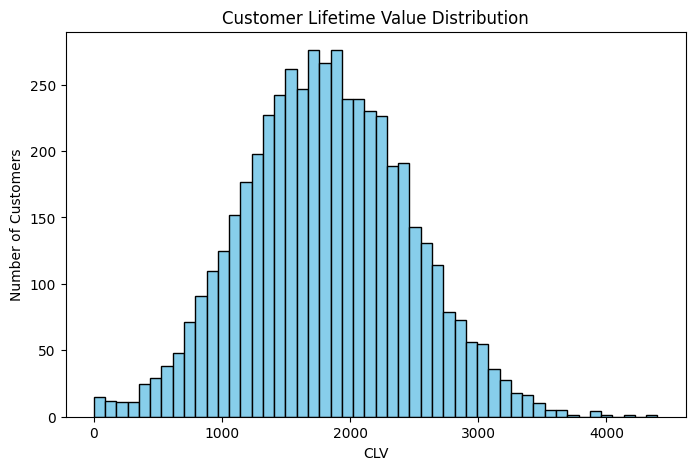

In [23]:
import matplotlib.pyplot as plt

# Histogram of CLV
plt.figure(figsize=(8,5))
plt.hist(clv_data['clv'], bins=50, color='skyblue', edgecolor='black')
plt.title("Customer Lifetime Value Distribution")
plt.xlabel("CLV")
plt.ylabel("Number of Customers")
plt.show()

## CLV Distribution Insights

The CLV distribution is typically right-skewed, meaning:

- A small percentage of customers contribute a disproportionately large portion of total revenue.
- Most customers fall into the Low or Mid value segments.

This visualization helps the business focus retention and growth strategies where they have the highest ROI.

## Growth Optimization Modeling

Now we simulate retention interventions to maximize business value.  
We will focus on customers where the incremental CLV gain exceeds the cost of retention programs, ensuring a positive ROI.


In [24]:
retention_cost = 50
retention_lift = 1.20

# Simulate CLV after retention intervention
clv_data['clv_after_retention'] = clv_data['clv'] * retention_lift

# Compute expected profit from retention
clv_data['retention_profit'] = clv_data['clv_after_retention'] - clv_data['clv'] - retention_cost

# Decide which customers to target
clv_data['target_for_retention'] = clv_data['retention_profit'] > 0

In [25]:
# Total expected retention profit
total_profit = clv_data.loc[clv_data['target_for_retention'], 'retention_profit'].sum()
print("Expected total profit from targeted retention:", total_profit)

# Count of customers selected for retention
clv_data['target_for_retention'].value_counts()

Expected total profit from targeted retention: 1564600.3384296899


,count
target_for_retention,
True,4962
False,38


## Growth Optimization Strategy

- Only customers whose incremental CLV gain exceeds the retention program cost are targeted.
- This ensures that retention spending produces a positive ROI.
- Focused retention improves efficiency and maximizes total business value.